# Desplazamientos y tensiones en el suelo - Método analítico

In [17]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

Solución anañítica cerrada para un médio semi-infinito con un túnel circular. Estas ecuaciones pueden ser utilizadas para estimar desplazamientos en suelos blandos, produciendo resultados conservadores en rocas. No se consideran cargas exteriores. 

Los desplazamientos verticales (Uz) y horizontales (Ux) son función de: radio de túnel excavado (R), coeficiente de Poisson del suelo (nu), profundidad del hastial (H), perdida de suelo promedio (eps0), ángulo de fricción interna del suelo (phi).


In [66]:
#Definición de funciones

def Uz(x,z,R,nu,H,eps0,phi):
    #subdivido la ecuacion en partes para mejor manejo
    beta=np.pi/2+np.deg2rad(phi)
    a=eps0*R**2
    b=-(z-H)/(x**2+(z-H)**2)
    c=(3-4*nu)*(z+H)/(x**2+(z+H)**2)
    d=-2*z*(x**2-(z-H)**2)/(x**2+(z+H)**2)**2
    e=np.exp(-((1.38*x**2)/(H/np.tan(beta)+R)**2+(0.69*z**2)/(H**2)))
    return -a*(b+c+d)*e

def Ux(x,z,R,nu,H,eps0,phi):
    #subdivido la ecuacion en partes para mejor manejo
    beta=np.pi/2+np.deg2rad(phi)
    a=eps0*R**2*x
    b=1/(x**2+(H-z)**2)
    c=(3-4*nu)/(x**2+(z+H)**2)
    d=-4*z*(z+H)/(x**2+(z+H)**2)**2
    e=np.exp(-((1.38*x**2)/(H/np.tan(beta)+R)**2+(0.69*z**2)/(H**2)))
    return a*(b+c+d)*e

def U(x,z,R,nu,H,eps0,phi):
    #una simple suma de vectores
    return np.sqrt(Ux(x,z,R,nu,H,eps0,phi)**2 + Uz(x,z,R,nu,H,eps0,phi)**2)
    

Definición de parámetros

In [13]:
R=2 #radio de túnel excavado (m)
nu=0.2 #coeficiente de Poisson del suelo (-)
H=10 #profundidad del hastial
eps0=0.02 #perdida de volumen (-)
phi=30 #ángulo de friccion interna del suelo (°)

Podemos obtener los desplazamientos para cada punto (x,z) del dominio

In [23]:
x=5 #distancia al eje del túnel (m)
z=-3 #profundidad desde nivel del suelo (m)

print('Uz=',Uz(x,z,R,nu,H,eps0,phi),'m')
print('Ux=',Uz(x,z,R,nu,H,eps0,phi),'m')
print('U=',Uz(x,z,R,nu,H,eps0,phi),'m')

Uz= 0.0006361289979700355 m
Ux= 0.0006361289979700355 m
U= 0.0006361289979700355 m


O graficar un mapa de desplazamientos del terreno

Text(0.5, 1.0, 'Simplest default with labels')

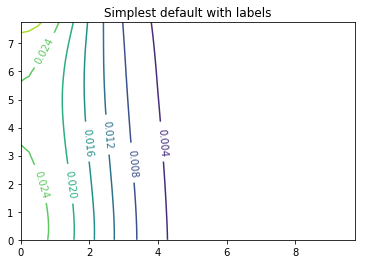

In [67]:
delta = 0.25
x = np.arange(0, 10.0, delta)
z = np.arange(0, 8, delta)
X, Z = np.meshgrid(x, z)

[NX,NZ]=X.shape

Ux_store=np.zeros((NX,NZ))
Uz_store=np.zeros((NX,NZ))
U_store=np.zeros((NX,NZ))

for nx in range(NX):
    for nz in range(NZ):
        xx=X[nx,nz]
        zz=Z[nx,nz]
        Ux_store[nx,nz]=Ux(xx,zz,R,nu,H,eps0,phi)
        Uz_store[nx,nz]=Uz(xx,zz,R,nu,H,eps0,phi)
        U_store[nx,nz]=U(xx,zz,R,nu,H,eps0,phi)

fig, ax = plt.subplots()
CS = ax.contour(X, Z, U_store)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

{1} N.Loganathan, H.G.Poulos, Fellow, ASCE - Analytical prediction for tunnel-induced ground movements in clays